In [1]:
# Importing libraries
import pandas as pd
import numpy as np

In [ ]:
def recommendation():
    
    # Read csv file into a pandas dataframe
    df = pd.read_csv("books.csv")
    df = df[df.language_code =='eng']
    df['Title'] = df['title'].str.split('(').str[0]
    print("Enter rating w/wo <rating> or random for book suggestion")
    search= input("enter to search ")
    if search=="random":
        df_new= df.sample(replace=True)[['Title', 'authors',"rating"]]
        print("Title: ", df_new[['Title']].to_string(index=False, header=False))
        print("Author: ", df_new[['authors']].to_string(index=False, header=False))
        print("Rating: ", df_new[['rating']].to_string(index=False, header=False))
        return "Enjoy!"
    else:
        if "rating" in search:
            search=search.split()
            rate=float(search[1])
            
            if rate < 0 or rate > 5:
                print("Error: Enter rating between 0 and 5")
                return "Please Correct"
            else:
                df_rate = df[df['rating'].astype(float) >= rate]
                df_new= df_rate.sample(replace=True)[['Title', 'authors',"rating"]]
                print("Title: ", df_new[['Title']].to_string(index=False, header=False))
                print("Author: ", df_new[['authors']].to_string(index=False, header=False))
                print("Rating: ", df_new[['rating']].to_string(index=False, header=False))
                return "Enjoy!"
print(recommendation())

In [ ]:
'''Visualization of the top 5 authors with the highest average ratings on their books in the form of charts or graphs.
Can use pandas, mathlib, etc'''

<AxesSubplot:xlabel='authors'>

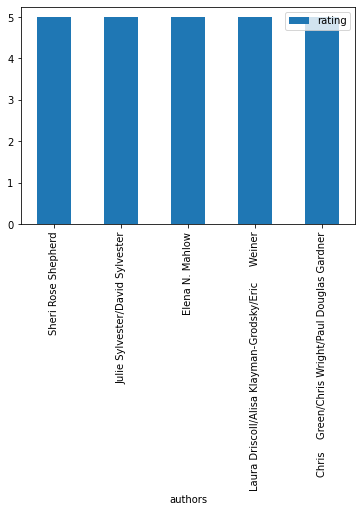

In [10]:
df = pd.read_csv("books.csv")
df = df[df.language_code =='eng']
df['rating']=df['rating'].astype(float)
top5_df = df.groupby(['authors'])[['rating']].mean().sort_values(['rating'],ascending = False).head(5)
top5_df.plot.bar()